## SEARCHING FOR A TREND IN E-FINANCE JOURNALS DATASET

### Lets Import the necessery Liberaries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('e-finance dataset.csv')
df.head()

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Access Type,Source,EID
0,"Beni E.H., Lagaisse B., Joosen W., Aly A., Bra...",57189258279;8933999000;22834655700;55841871100...,Datablinder: A distributed data protection mid...,2019,Middleware Industry 2019 - Proceedings of the ...,NaN,NaN,NaN,50,57.0,...,9781450370417,NaN,NaN,English,Middlew. Ind. - Proc. Int. Middlew. Conf. Ind....,Conference Paper,Final,Open Access,Scopus,2-s2.0-85078939286
1,"Xiong H., Zhou Y.",57212174318;57212168803;,Construction and Application of Ocean Shipping...,2019,Journal of Coastal Research,97,sp1,NaN,29,34.0,...,NaN,JCRSE,NaN,English,J. Coast. Res.,Article,Final,NaN,Scopus,2-s2.0-85076117139
2,"Feng L., Zhang H., Tsai W.-T., Sun S.",57194783804;56979549200;57050382000;57197771738;,System architecture for high-performance permi...,2019,Frontiers of Computer Science,13,6,NaN,1151,1165.0,...,NaN,NaN,NaN,English,Front. Comput. Sci.,Article,Final,NaN,Scopus,2-s2.0-85051801026
3,"Rožkalne Z., Mukāns M., Vētra A.",57211844555;56074676500;6506045608;,Transition-age young adults with cerebral pals...,2019,Medicina (Lithuania),55,11,737,NaN,NaN,...,NaN,NaN,31739609.0,English,Medicina,Article,Final,Open Access,Scopus,2-s2.0-85075115419
4,"Alshubiri F., Jamil S.A., Elheddad M.",56539905200;56770916900;57195032630;,The impact of ICT on financial development: Em...,2019,International Journal of Engineering Business ...,11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,English,Intern. J. Eng. Bus. Manage.,Article,Final,Open Access,Scopus,2-s2.0-85071721834


In [3]:
df.shape

(228, 46)

In [4]:
df.describe(include="all")

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Access Type,Source,EID
count,228,228,228,228.000000,227,180,147,27,206,199.000000,...,66,27,4.000000e+00,228,218,228,228,16,228,228
unique,210,209,224,NaN,146,75,23,27,165,NaN,...,64,23,NaN,4,142,7,1,1,1,228
top,Martin P.L.,57188559538;,E-Finance,NaN,International Journal of Electronic Finance,5,1,6702984,1,NaN,...,9783642284892,FACME,NaN,English,Int. J. Electron. Finance,Article,Final,Open Access,Scopus,2-s2.0-80052126506
freq,6,6,4,NaN,54,20,34,1,11,NaN,...,2,3,NaN,223,48,139,228,16,228,1
mean,NaN,NaN,NaN,2010.214912,NaN,NaN,NaN,NaN,NaN,723.462312,...,NaN,NaN,2.013451e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,6.172437,NaN,NaN,NaN,NaN,NaN,5156.031031,...,NaN,NaN,9.310620e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1981.000000,NaN,NaN,NaN,NaN,NaN,3.000000,...,NaN,NaN,1.030222e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,NaN,NaN,100.500000,...,NaN,NaN,1.424886e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,206.000000,...,NaN,NaN,1.924810e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,416.000000,...,NaN,NaN,2.513375e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### From the count row, we can see that the total number of observation is 228, and the year range is from 1981 to 2019.

In [5]:
#The Percentage of missing values in the dataset

null_percenatges = (df.isnull().sum()/df.shape[0])*100
null_percenatges

Authors                            0.000000
Author(s) ID                       0.000000
Title                              0.000000
Year                               0.000000
Source title                       0.438596
Volume                            21.052632
Issue                             35.526316
Art. No.                          88.157895
Page start                         9.649123
Page end                          12.719298
Page count                        98.245614
Cited by                          32.894737
DOI                               23.684211
Link                               0.000000
Affiliations                       6.140351
Authors with affiliations          0.877193
Abstract                           0.000000
Author Keywords                   21.052632
Index Keywords                    55.701754
Molecular Sequence Numbers       100.000000
Chemicals/CAS                    100.000000
Tradenames                       100.000000
Manufacturers                   

#### We will have to drop the columns with null values above 60%.  

In [6]:
threshold = (60 / 100) * df.shape[0] #This is the threshold number of observations that can be null
isnull_per_column = df.isnull().sum() 
useful_features = isnull_per_column[isnull_per_column < threshold].index #Removing the needed columns/features from all the columns
df = df[useful_features] 

In [7]:
#Check the dataset again
df.isnull().sum()

Authors                            0
Author(s) ID                       0
Title                              0
Year                               0
Source title                       1
Volume                            48
Issue                             81
Page start                        22
Page end                          29
Cited by                          75
DOI                               54
Link                               0
Affiliations                      14
Authors with affiliations          2
Abstract                           0
Author Keywords                   48
Index Keywords                   127
References                        16
Correspondence Address            37
Publisher                         88
ISSN                              54
Language of Original Document      0
Abbreviated Source Title          10
Document Type                      0
Publication Stage                  0
Source                             0
EID                                0
d

#### From the above count values, we have dropped Columns with empty entries above 60%

### Looking for Language of Original Document 

In [8]:
df['Language of Original Document'].unique()

array(['English', 'Polish', 'Chinese', 'German'], dtype=object)

Language of Original Document
Chinese      2
English    223
German       2
Polish       1
Name: Language of Original Document, dtype: int64

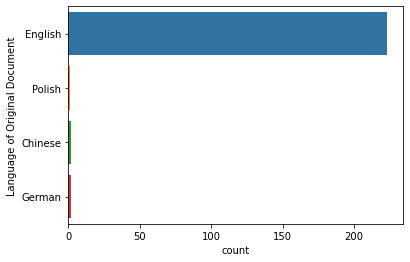

In [9]:
language_count=df.groupby('Language of Original Document')['Language of Original Document'].count()
sns.countplot(y='Language of Original Document',data=df)
language_count

#### From the above array, we can see that the Journals are from four languages. English,Polish,Chinese,German.

- #### The most is English

In [10]:
df["Year"].unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 1988, 1986, 1984,
       1981], dtype=int64)

We can get all the available years in a list by getting the unique values in the year column

In [11]:
years = sorted(list(df["Year"].unique()))
years

[1981,
 1984,
 1986,
 1988,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

We can also get the distribution of the dataset in the number of journals we have per year

In [12]:
year_count = df["Year"].value_counts().sort_index()
year_count

1981     2
1984     1
1986     1
1988     1
2001     5
2002     8
2003     4
2004     7
2005    10
2006    15
2007    13
2008     9
2009     4
2010    19
2011    35
2012    19
2013    13
2014     9
2015    11
2016     7
2017    11
2018     9
2019    15
Name: Year, dtype: int64

C:\Users\rahul\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


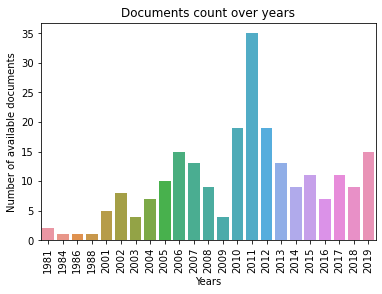

In [13]:
sns.barplot(years, year_count)
plt.xticks(rotation=90)
plt.ylabel('Number of available documents')
plt.xlabel('Years')
plt.title("Documents count over years")
plt.savefig("Documents count.png")
plt.show()

#### From the above plot, we can see the most jornals are dated 2011 from the dataset.
- We can see that from 1988 to 2000 there were no documents published

### Correlating Authors with Author ID 

In [14]:
df['Author(s) ID'] = df['Author(s) ID'].str.rstrip(';')

In [15]:
df = df.assign(Authors=df['Authors'].str.split(','))
df = df.assign(**{'Author(s) ID': df['Author(s) ID'].str.split(';')})
df.head()

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Page start,Page end,Cited by,...,References,Correspondence Address,Publisher,ISSN,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Source,EID
0,"[Beni E.H., Lagaisse B., Joosen W., Aly A.,...","[57189258279, 8933999000, 22834655700, 5584187...",Datablinder: A distributed data protection mid...,2019,Middleware Industry 2019 - Proceedings of the ...,NaN,NaN,50,57.0,NaN,...,"Agrawal, R., Kiernan, J., Srikant, R., Xu, Y.,...",NaN,"Association for Computing Machinery, Inc",NaN,English,Middlew. Ind. - Proc. Int. Middlew. Conf. Ind....,Conference Paper,Final,Scopus,2-s2.0-85078939286
1,"[Xiong H., Zhou Y.]","[57212174318, 57212168803]",Construction and Application of Ocean Shipping...,2019,Journal of Coastal Research,97,sp1,29,34.0,NaN,...,"Boczon, A., Dudzinska, M., Kowalska, A., Effec...","Xiong, H.; School of Management, Nanchang Univ...",Coastal Education Research Foundation Inc.,07490208,English,J. Coast. Res.,Article,Final,Scopus,2-s2.0-85076117139
2,"[Feng L., Zhang H., Tsai W.-T., Sun S.]","[57194783804, 56979549200, 57050382000, 571977...",System architecture for high-performance permi...,2019,Frontiers of Computer Science,13,6,1151,1165.0,2.0,...,"Garay, J., Kiayias, A., Leonardos, N., The bit...","Zhang, H.; State Key Laboratory of Software De...",Higher Education Press,20952228,English,Front. Comput. Sci.,Article,Final,Scopus,2-s2.0-85051801026
3,"[Rožkalne Z., Mukāns M., Vētra A.]","[57211844555, 56074676500, 6506045608]",Transition-age young adults with cerebral pals...,2019,Medicina (Lithuania),55,11,NaN,NaN,NaN,...,"Mutch, L., Alberman, E., Hagberg, B., Kodama, ...","Rožkalne, Z.; Rehabilitation Clinic, Children’...",MDPI AG,1010660X,English,Medicina,Article,Final,Scopus,2-s2.0-85075115419
4,"[Alshubiri F., Jamil S.A., Elheddad M.]","[56539905200, 56770916900, 57195032630]",The impact of ICT on financial development: Em...,2019,International Journal of Engineering Business ...,11,NaN,NaN,NaN,NaN,...,"Sassi, S., Goaied, M., Financial development, ...","Alshubiri, F.; Department of Finance and Econo...",SAGE Publications Inc.,18479790,English,Intern. J. Eng. Bus. Manage.,Article,Final,Scopus,2-s2.0-85071721834


In [16]:
df_authors = df[['Authors', 'Title', 'Year']]
df_authors.head()

,Authors,Title,Year
0,"[Beni E.H., Lagaisse B., Joosen W., Aly A.,...",Datablinder: A distributed data protection mid...,2019
1,"[Xiong H., Zhou Y.]",Construction and Application of Ocean Shipping...,2019
2,"[Feng L., Zhang H., Tsai W.-T., Sun S.]",System architecture for high-performance permi...,2019
3,"[Rožkalne Z., Mukāns M., Vētra A.]",Transition-age young adults with cerebral pals...,2019
4,"[Alshubiri F., Jamil S.A., Elheddad M.]",The impact of ICT on financial development: Em...,2019


In [17]:
df_authors = df_authors.explode('Authors').reset_index(drop=True)
df_authors.drop(132, inplace=True) ## Row 132 dropped 
df_authors.reset_index(drop=True, inplace=True)
df_authors.head(10)

,Authors,Title,Year
0,Beni E.H.,Datablinder: A distributed data protection mid...,2019
1,Lagaisse B.,Datablinder: A distributed data protection mid...,2019
2,Joosen W.,Datablinder: A distributed data protection mid...,2019
3,Aly A.,Datablinder: A distributed data protection mid...,2019
4,Brackx M.,Datablinder: A distributed data protection mid...,2019
5,Xiong H.,Construction and Application of Ocean Shipping...,2019
6,Zhou Y.,Construction and Application of Ocean Shipping...,2019
7,Feng L.,System architecture for high-performance permi...,2019
8,Zhang H.,System architecture for high-performance permi...,2019
9,Tsai W.-T.,System architecture for high-performance permi...,2019


- The row with modified-index 132 was dropped because the name was mistakingly added to the dataset and didn't belong to anybody.

- Also, a quick Google search revealed that no such author 'Jr.' was among the writers of the journal 'The Phenomenological Experience of First Responder Spouses', published in January 2016.

In [18]:
df_author_ids = df[['Author(s) ID', 'Title', 'Year']]
df_author_ids.head()

,Author(s) ID,Title,Year
0,"[57189258279, 8933999000, 22834655700, 5584187...",Datablinder: A distributed data protection mid...,2019
1,"[57212174318, 57212168803]",Construction and Application of Ocean Shipping...,2019
2,"[57194783804, 56979549200, 57050382000, 571977...",System architecture for high-performance permi...,2019
3,"[57211844555, 56074676500, 6506045608]",Transition-age young adults with cerebral pals...,2019
4,"[56539905200, 56770916900, 57195032630]",The impact of ICT on financial development: Em...,2019


In [19]:
df_author_ids = df_author_ids.explode('Author(s) ID').reset_index(drop=True)
df_author_ids.head(10)

,Author(s) ID,Title,Year
0,57189258279,Datablinder: A distributed data protection mid...,2019
1,8933999000,Datablinder: A distributed data protection mid...,2019
2,22834655700,Datablinder: A distributed data protection mid...,2019
3,55841871100,Datablinder: A distributed data protection mid...,2019
4,55387606200,Datablinder: A distributed data protection mid...,2019
5,57212174318,Construction and Application of Ocean Shipping...,2019
6,57212168803,Construction and Application of Ocean Shipping...,2019
7,57194783804,System architecture for high-performance permi...,2019
8,56979549200,System architecture for high-performance permi...,2019
9,57050382000,System architecture for high-performance permi...,2019


In [20]:
authors_and_id = pd.concat([df_authors.Authors, df_author_ids], axis=1)
authors_and_id.head(10)

,Authors,Author(s) ID,Title,Year
0,Beni E.H.,57189258279,Datablinder: A distributed data protection mid...,2019
1,Lagaisse B.,8933999000,Datablinder: A distributed data protection mid...,2019
2,Joosen W.,22834655700,Datablinder: A distributed data protection mid...,2019
3,Aly A.,55841871100,Datablinder: A distributed data protection mid...,2019
4,Brackx M.,55387606200,Datablinder: A distributed data protection mid...,2019
5,Xiong H.,57212174318,Construction and Application of Ocean Shipping...,2019
6,Zhou Y.,57212168803,Construction and Application of Ocean Shipping...,2019
7,Feng L.,57194783804,System architecture for high-performance permi...,2019
8,Zhang H.,56979549200,System architecture for high-performance permi...,2019
9,Tsai W.-T.,57050382000,System architecture for high-performance permi...,2019


In [21]:
author_count = authors_and_id.Authors.value_counts()
author_count

Martin P.L.        6
 Zhong N.          5
Hu J.              5
Sakkthivel A.M.    4
 Al-Naeem T.       3
                  ..
 Shi J.            1
 Wirth H.          1
DeVries P.D.       1
 Stepney S.        1
 Keesling G.       1
Name: Authors, Length: 510, dtype: int64

We see that there are 510 authors in total.

We also see that the author with the most publications is Martin P.L with 6 publications, closely followed by Hu J. and Zhong N.; each with 5 apiece.

#### Adding "Number of Authors" per document column

In [22]:
no_of_authors = [len(ids)for ids in df['Author(s) ID'].values]
df['Number of Authors'] = no_of_authors
df.head()

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Page start,Page end,Cited by,...,Correspondence Address,Publisher,ISSN,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Source,EID,Number of Authors
0,"[Beni E.H., Lagaisse B., Joosen W., Aly A.,...","[57189258279, 8933999000, 22834655700, 5584187...",Datablinder: A distributed data protection mid...,2019,Middleware Industry 2019 - Proceedings of the ...,NaN,NaN,50,57.0,NaN,...,NaN,"Association for Computing Machinery, Inc",NaN,English,Middlew. Ind. - Proc. Int. Middlew. Conf. Ind....,Conference Paper,Final,Scopus,2-s2.0-85078939286,5
1,"[Xiong H., Zhou Y.]","[57212174318, 57212168803]",Construction and Application of Ocean Shipping...,2019,Journal of Coastal Research,97,sp1,29,34.0,NaN,...,"Xiong, H.; School of Management, Nanchang Univ...",Coastal Education Research Foundation Inc.,07490208,English,J. Coast. Res.,Article,Final,Scopus,2-s2.0-85076117139,2
2,"[Feng L., Zhang H., Tsai W.-T., Sun S.]","[57194783804, 56979549200, 57050382000, 571977...",System architecture for high-performance permi...,2019,Frontiers of Computer Science,13,6,1151,1165.0,2.0,...,"Zhang, H.; State Key Laboratory of Software De...",Higher Education Press,20952228,English,Front. Comput. Sci.,Article,Final,Scopus,2-s2.0-85051801026,4
3,"[Rožkalne Z., Mukāns M., Vētra A.]","[57211844555, 56074676500, 6506045608]",Transition-age young adults with cerebral pals...,2019,Medicina (Lithuania),55,11,NaN,NaN,NaN,...,"Rožkalne, Z.; Rehabilitation Clinic, Children’...",MDPI AG,1010660X,English,Medicina,Article,Final,Scopus,2-s2.0-85075115419,3
4,"[Alshubiri F., Jamil S.A., Elheddad M.]","[56539905200, 56770916900, 57195032630]",The impact of ICT on financial development: Em...,2019,International Journal of Engineering Business ...,11,NaN,NaN,NaN,NaN,...,"Alshubiri, F.; Department of Finance and Econo...",SAGE Publications Inc.,18479790,English,Intern. J. Eng. Bus. Manage.,Article,Final,Scopus,2-s2.0-85071721834,3


In [23]:
df.sort_values('Number of Authors', ascending=False).head(3) 

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Page start,Page end,Cited by,...,Correspondence Address,Publisher,ISSN,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Source,EID,Number of Authors
205,"[Ondategui-Parra S., Bhagwat J.G., Zou K.H.,...","[8237524700, 8951098600, 7006828339, 700673145...",Practice management performance indicators in ...,2004,Radiology,233,3,716,722.0,40.0,...,"Ondategui-Parra, S.email: sondateguiparra@part...",NaN,00338419,English,Radiology,Article,Final,Scopus,2-s2.0-16544368575,8
203,"[Godart C., Molli P., Oster G., Perrin O., ...","[7005233014, 6603158402, 8412487000, 660384413...",The ToxicFarm integrated cooperation framework...,2004,Distributed and Parallel Databases,15,1,67,88.0,14.0,...,"Godart, C.; LORIA, INRIA, Lorraine, France; em...",NaN,09268782,English,Distrib Parallel Databases,Article,Final,Scopus,2-s2.0-0842348211,7
31,"[Huang Y., Fu C., Chen X., Guo H., He X., ...","[57193141268, 56652938100, 57202191954, 571946...",A mutation approach of detecting SQL injection...,2017,Lecture Notes in Computer Science (including s...,10603 LNCS,NaN,175,188.0,2.0,...,"Liu, Z.; Nankai UniversityChina; email: liuzhe...",Springer Verlag,03029743,English,Lect. Notes Comput. Sci.,Conference Paper,Final,Scopus,2-s2.0-85034244235,7


- The Document with the most authors is 'Practice management performance indicators in academic radiology departments.' with 8 authors.

#### Source Title 

In [24]:
df['Source title'].value_counts()

International Journal of Electronic Finance                                                                                             54
Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics)    12
T and D                                                                                                                                  6
Formal Aspects of Computing                                                                                                              3
Electronic Government                                                                                                                    2
                                                                                                                                        ..
Mathematics and Computers in Simulation                                                                                                  1
Promoting Ethnic Diversity 

- There are <b>146 source titles</b> 
- "The International Journal of Electronic Finance" had the most (54) documents published in the dataset.

In [25]:
df.groupby(['Year', 'Source title']).count()['Title'].sort_values(ascending=False).head(8)

Year  Source title                                                                                                                        
2011  International Journal of Electronic Finance                                                                                             19
2012  International Journal of Electronic Finance                                                                                             11
2013  International Journal of Electronic Finance                                                                                              7
2010  International Journal of Electronic Finance                                                                                              5
2015  International Journal of Electronic Finance                                                                                              4
2002  T and D                                                                                                                           

According to this dataset, It is obvious that the International Journal of Electronic Finance is consistently the 'go-to' publishing journal for e-finance publications; with them publishing the most documents almost every year.`

In [26]:
titles = df['Title'].apply(lambda x: re.sub(r'[!@#\\$?%&:;"\',./*)(]+', '', x))
title_string = ' '.join(titles).lower()
abstracts =  df['Abstract'].apply(lambda x: re.sub(r'[!@#\\$?%&:;"\',./*)(]+', '', x))
abstract_string = ' '.join(abstracts).lower()
titles_and_abstracts = title_string + abstract_string

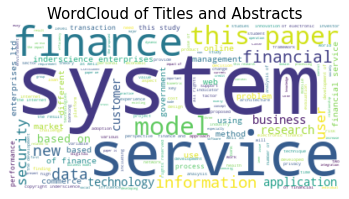

In [27]:
wc = WordCloud(background_color='white', stopwords=STOPWORDS).generate(titles_and_abstracts)
plt.imshow(wc, interpolation='bilinear')
plt.axis(False)
plt.title('WordCloud of Titles and Abstracts', fontdict={'fontsize': 15, 'fontweight': 20})
plt.show()

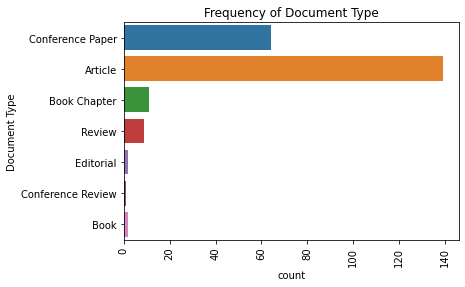

In [28]:
sns.countplot(y='Document Type',data=df)
plt.xticks(rotation =90)
plt.title("Frequency of Document Type")
plt.savefig("Freq of document type")

#### Max number of publishers

In [29]:
print(df['Publisher'].value_counts().sort_values(ascending=False).head(5))
print()
df_publisher = df['Publisher'].value_counts()
print("Number of publishers with one document are:", df_publisher[df_publisher==1].sum())
print("Number of publishers with two documents are:", df_publisher[df_publisher==2].sum())

Inderscience Publishers                                   60
Institute of Electrical and Electronics Engineers Inc.     8
Springer Verlag                                            8
IGI Global                                                 5
Emerald Group Publishing Ltd.                              3
Name: Publisher, dtype: int64

Number of publishers with one document are: 38
Number of publishers with two documents are: 18


<b> Inderscience Publishers </b> have maximum journals over the years

In [30]:
authors_dict = {}
for row in df["Authors"]:
    for author in row:
        if author in authors_dict:
            authors_dict[author] += 1
        else:
            authors_dict[author] = 1

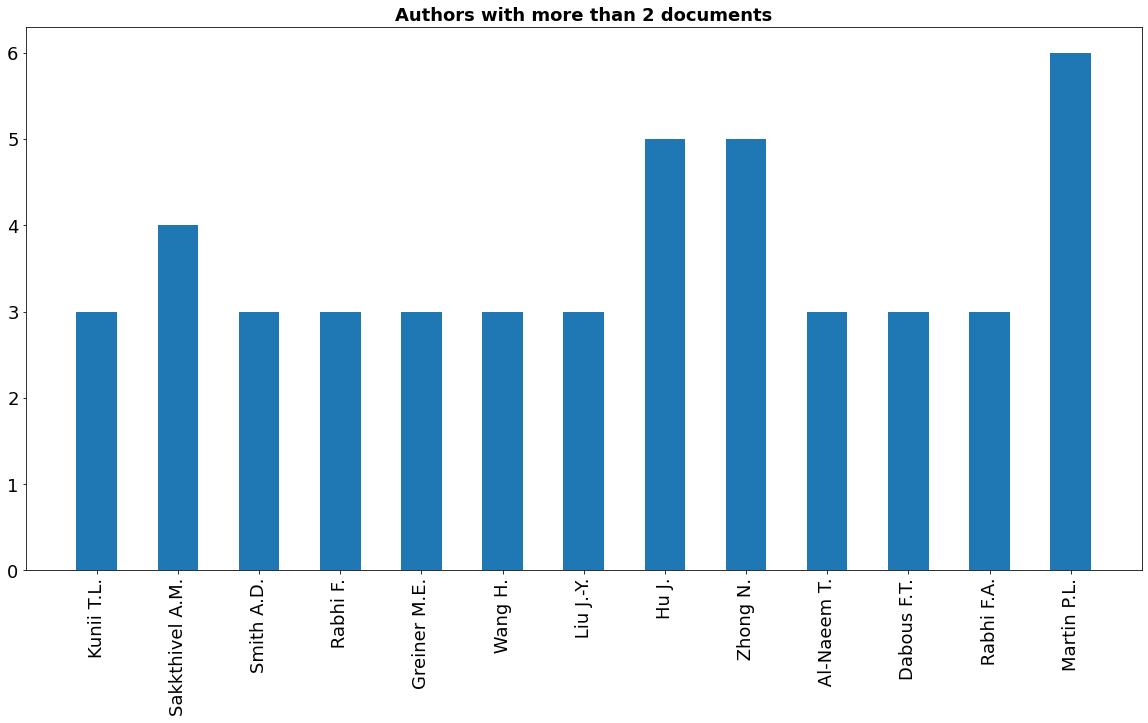

In [31]:
author_more2 = {key: value for key, value in authors_dict.items() if value > 2} # Authors with more than 2 documents
y_values = list(author_more2.values())
authors = list(author_more2.keys())
plt.figure(figsize=(20, 10))
plt.bar(range(len(author_more2)), y_values, tick_label=authors, width=0.5)
plt.xticks(rotation=90, fontsize=18 )
plt.yticks(fontsize=18)
plt.title("Authors with more than 2 documents", fontsize=18, fontweight="bold")
plt.savefig('Authors_morethan2_docs.png')
plt.show()


- We have 511 authors. 
- Out of that we can see that <b>Martin P.L</b> has the highest number of <b>6 documents <b>

In [32]:
df.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Page start', 'Page end', 'Cited by', 'DOI', 'Link',
       'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'References',
       'Correspondence Address', 'Publisher', 'ISSN',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Source', 'EID',
       'Number of Authors'],
      dtype='object')

In order to get some insight into the trend in the finance industry from the given years, we can explore the abstracts column

### Classification of documents based on year groups 

Below, we are going to cut the years into a group of ranges since from the given distribution of the abstracts we have per year, the data is very uneven.

In [33]:
df_1 = df.copy()
df_1["year_groups"] = pd.cut(df["Year"], 
                             bins = [1981, 2001, 2006, 2010, 2016, np.inf], 
                             labels = ["1981-2000", "2001-2005", "2006-2009", "2010-2015", "2016-2019"])


df_1["Abstract"] = df_1["Abstract"].astype(str).str.replace("(\[No abstract available\])", "") #str.replace was used with a regular expression
df_aggregated = df_1[['year_groups', 'Abstract']].groupby("year_groups").sum()

#Resetting the index
df_1 = df_1.reset_index()
df_1["year_groups"].value_counts()

2010-2015    94
2006-2009    45
2001-2005    44
2016-2019    35
1981-2000     8
Name: year_groups, dtype: int64

#### Conclusion 
- From 1981-2000 only 8 documents are there
- From 2000 onwards documents published are increased and as we have seen that in 2011 there are 11 documents were published 
- Max number of documents were published from 2010-2015 i.e. 94 & then number of published documents were less. 

### Distribution of documents based upon Abstract 

1. Below, we are going to check the distribution of the number of characters used per abstract

Text(0.5, 1.0, 'Documents distribution based upon character')

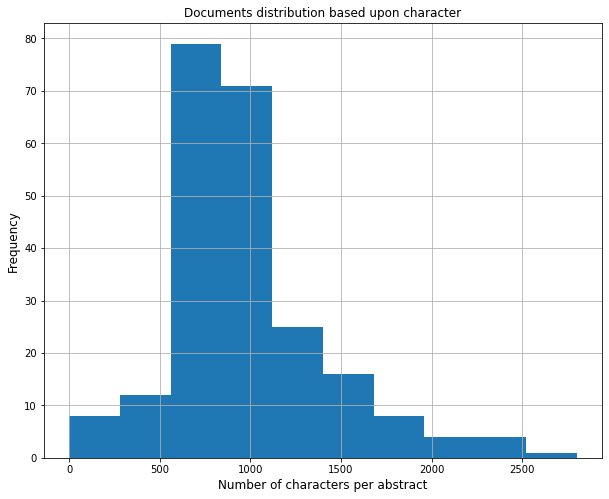

In [34]:
plt.figure(figsize=(10,8))
df_1["Abstract"].str.len().hist()
plt.xlabel("Number of characters per abstract", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Documents distribution based upon character", fontsize=12)

- Most of the documents are having Abstract with <b> 500-1100 characters<b>

2. We are also going to check the number of words used per abstract

Text(0.5, 1.0, 'Documents distribution based upon word')

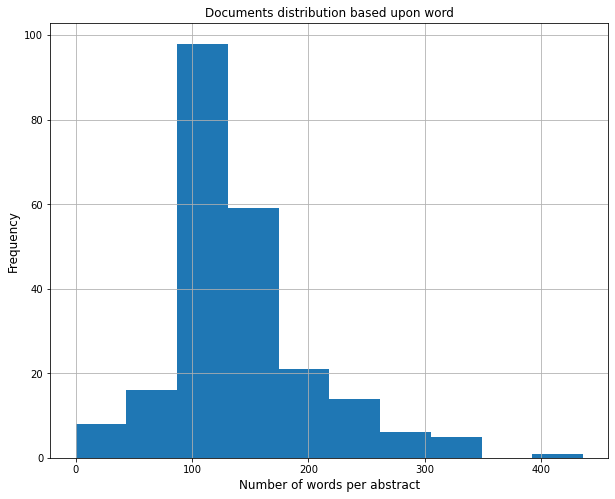

In [35]:
plt.figure(figsize=(10,8))
df_1["Abstract"].str.split().map(lambda x: len(x)).hist() #This line converts the text abstracts into a list of slit words and counts the words with the len function
plt.xlabel("Number of words per abstract", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Documents distribution based upon word", fontsize=12)

- The number of words used in each of the abstracts range from 50 - 340 words. 
- The average word length is from 70 - 180 words from the graph seen above

In [36]:
df_aggregated = df_aggregated.reset_index() ## dataframe with all abstracts in year group 
df_aggregated

,year_groups,Abstract
0,1981-2000,An overview is given on the provisions of the ...
1,2001-2005,We describe our experiences in mechanising the...
2,2006-2009,Selected websites of Polish e-finance segment ...
3,2010-2015,The financial system is currently undergoing a...
4,2016-2019,Business application owners want to outsource ...


We also want to include some customized year ranges that cannot be done with pd.cut, therefore we create a function for creating boolean values that we can use to select years from the dataframe

In [37]:
#We have some custom ranges that we cannot achieve with the pd.cut function
year_range2001_2009 = np.arange(2001, 2010, 1) 
year_range2010_2019 = np.arange(2010, 2019, 1)

#Creating a function that can return the boolean values of the years in the customised range
def row_in_range(row, year_range):
    if row in year_range:
        return True
    return False

boolean_2001_2009 = df.Year.map(lambda x: row_in_range(x, year_range2001_2009))
boolean_2010_2019 = df.Year.map(lambda x: row_in_range(x, year_range2010_2019))
abstract_2001_2009 = df[boolean_2001_2009]["Abstract"].sum()
abstract_2010_2019 = df[boolean_2010_2019]["Abstract"].sum()

Creating a dataframe that will be concatenated with the initial year_ranges

In [38]:
df_custom_range_abstract = pd.DataFrame({
    "year_groups": ["2001-2009", "2010-2019"],
    "Abstract": [abstract_2001_2009, abstract_2010_2019]
})

df_custom_range_abstract

,year_groups,Abstract
0,2001-2009,"In Europe, fragmentation of execution venues h..."
1,2010-2019,Building on concepts drawn from control theory...


In [39]:
combined_data = pd.concat([df_aggregated, df_custom_range_abstract]).reset_index(drop=True)
combined_data

,year_groups,Abstract
0,1981-2000,An overview is given on the provisions of the ...
1,2001-2005,We describe our experiences in mechanising the...
2,2006-2009,Selected websites of Polish e-finance segment ...
3,2010-2015,The financial system is currently undergoing a...
4,2016-2019,Business application owners want to outsource ...
5,2001-2009,"In Europe, fragmentation of execution venues h..."
6,2010-2019,Building on concepts drawn from control theory...


### NLP of Abstract feature 

In [40]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [41]:
#Importing the necessary libraries
import re
import string
import nltk 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stopwords = set(stopwords.words("english"))

In [42]:
def clean_abstracts(row, tokenizer, stopwords):
    """Pre-process row and generate word tokens

    Args:
        row: Text to tokenize.

    Returns:
        Tokenized row.
    """
    row = str(row).lower()  # Lowercase words
    row = re.sub(r"\s+", " ", row)  # Remove multiple spaces in content
    row = re.sub(f"[{re.escape(string.punctuation)}]", "", row)  # Remove punctuations

    tokens = tokenizer(row)  # Get tokens from row
    tokens = [t for t in tokens if not t in stopwords]  # Remove stopwords
    tokens = ["" if t.isdigit() else t for t in tokens]  # Remove digits
    tokens = [t for t in tokens if len(t) > 2]  # Remove short tokens
    return tokens

In [43]:
from collections import Counter

#Creating a function to draw the word freguency chart for the words mostly used in some range of years
def draw_word_frequency(dataframe):
    """Draw a freuency graph for the words that we have in each year range

    Args:
        dataframe: The dataframe we are working with

    Returns:
        A bar plot
    """
    def get_most(Abstract):
        counter = Counter(Abstract)
        most = counter.most_common()
        return most

    fig, axes = plt.subplots(7, 1, figsize=(10, 29))
    fig.suptitle("Top frequently used words")
    for i in range(7):
        most = get_most(dataframe["Abstract_words"][i])
        x, y= [], []
        for word, count in most[:20]:
            x.append(word)
            y.append(count)
        axes[i].set_title("year_range {}".format(dataframe["year_groups"][i]))        
        sns.barplot(x=y, y=x, ax=axes[i])

In [44]:
#Cleaning the data with the created function
combined_data["Abstract_words"] = combined_data["Abstract"].map(lambda x: clean_abstracts(x, nltk.word_tokenize, stopwords))

combined_data

,year_groups,Abstract,Abstract_words
0,1981-2000,An overview is given on the provisions of the ...,"[overview, given, provisions, european, instru..."
1,2001-2005,We describe our experiences in mechanising the...,"[describe, experiences, mechanising, specifica..."
2,2006-2009,Selected websites of Polish e-finance segment ...,"[selected, websites, polish, efinance, segment..."
3,2010-2015,The financial system is currently undergoing a...,"[financial, system, currently, undergoing, rev..."
4,2016-2019,Business application owners want to outsource ...,"[business, application, owners, want, outsourc..."
5,2001-2009,"In Europe, fragmentation of execution venues h...","[europe, fragmentation, execution, venues, tri..."
6,2010-2019,Building on concepts drawn from control theory...,"[building, concepts, drawn, control, theory, s..."


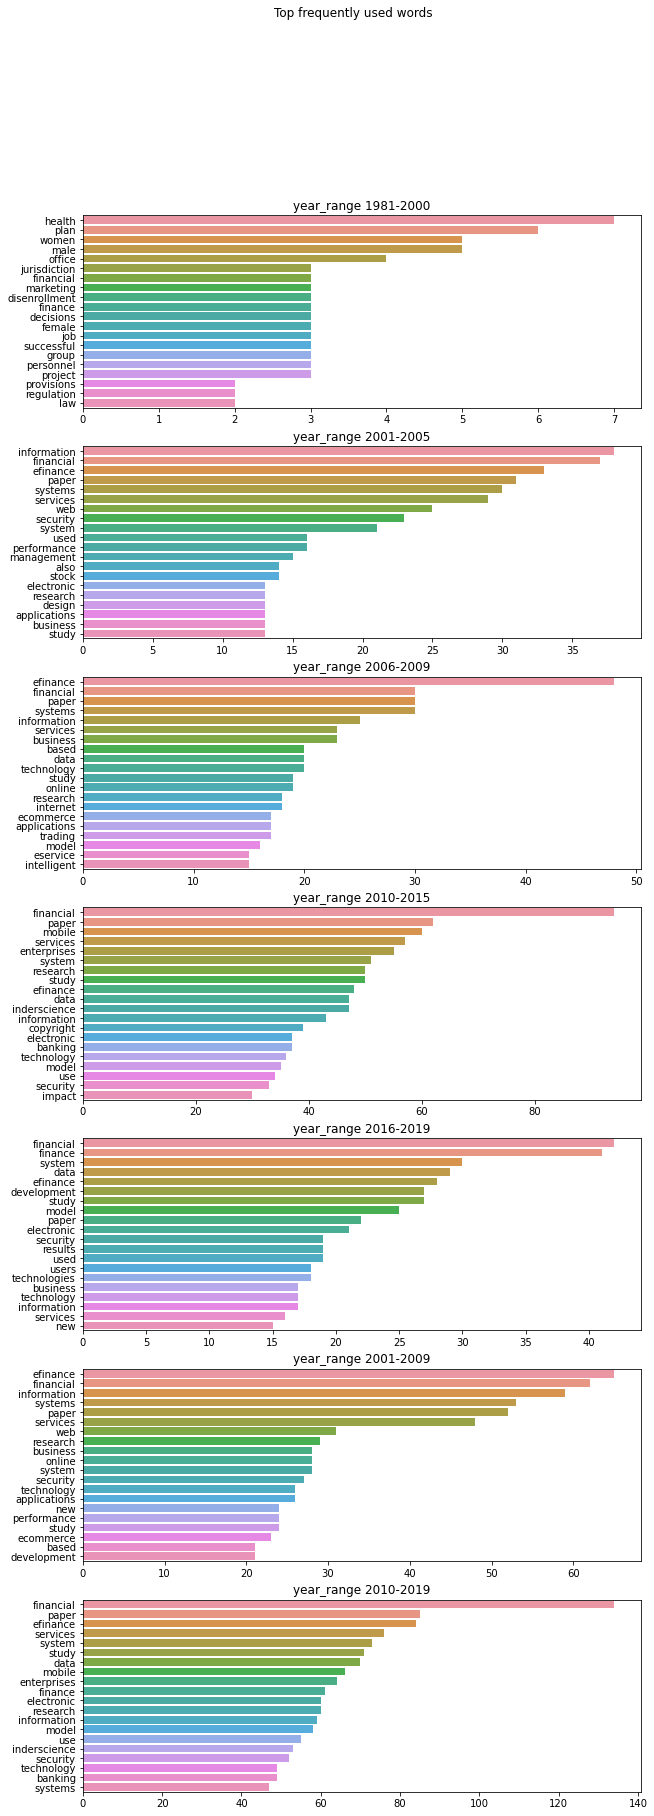

In [45]:
draw_word_frequency(combined_data)

In [46]:
def clean_abstracts2(row, tokenizer, stopwords):
    """Pre-process row and generate corpus

    Args:
        row: Text to tokenize.

    Returns:
       sentence Tokenized row.
    """
    sentences = tokenizer(row)
    corpus = []
    wordnet = WordNetLemmatizer()
    
    for i in range(len(sentences)):
        review = re.sub("[^a-zA-Z]", " ", sentences[i])
        review = review.lower()
        review = review.split() #The output of this is a list
        review = [wordnet.lemmatize(word) for word in review if word not in stopwords]
        review = " ".join(review) #Convert the list back to a string
        corpus.append(review)
    return corpus

In [47]:
combined_data["Abstract_sentences"] = combined_data["Abstract"].map(lambda x: clean_abstracts2(x, nltk.sent_tokenize, stopwords))

In [48]:
combined_data

,year_groups,Abstract,Abstract_words,Abstract_sentences
0,1981-2000,An overview is given on the provisions of the ...,"[overview, given, provisions, european, instru...",[overview given provision european instrument ...
1,2001-2005,We describe our experiences in mechanising the...,"[describe, experiences, mechanising, specifica...",[describe experience mechanising specification...
2,2006-2009,Selected websites of Polish e-finance segment ...,"[selected, websites, polish, efinance, segment...",[selected website polish e finance segment ana...
3,2010-2015,The financial system is currently undergoing a...,"[financial, system, currently, undergoing, rev...",[financial system currently undergoing revolut...
4,2016-2019,Business application owners want to outsource ...,"[business, application, owners, want, outsourc...",[business application owner want outsource dat...
5,2001-2009,"In Europe, fragmentation of execution venues h...","[europe, fragmentation, execution, venues, tri...",[europe fragmentation execution venue triggere...
6,2010-2019,Building on concepts drawn from control theory...,"[building, concepts, drawn, control, theory, s...",[building concept drawn control theory self ad...


In [49]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams_barchart(num_grams, dataframe):
    """Plot the top_n grams frequency graph

    Args:
        num_grams: Intended number of grams
        dataframe: The dataframe we are working with

    Returns:
       A bar plot of n_grams per year range in all the year ranges
    """
    def _get_top_ngram(corpus, n=None):
        """Get the top n_grams from the text document (corpus)

        Args:
            n: Number of grams to get
            corpus: The text document from which we are getting the n_grams

        Returns:
            The top 20 n_grams with their frequency
        """
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) #Adding all the occurences of the words in each sentence
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()] #Since we essentially have only one row now we select the word count per idx(word)
        words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True) #Sort by the counts
        return words_freq[:20] 
    
    fig, axes = plt.subplots(7, 1, figsize=(13, 30))
    fig.suptitle("Top {} grams".format(num_grams))
    for i in range(7):
        top_n_bigrams = _get_top_ngram(dataframe["Abstract_sentences"][i], num_grams)
        x, y = map(list, zip(*top_n_bigrams))
        axes[i].set_title('Top {} grams for the years {}'.format(num_grams, dataframe["year_groups"][i]))
        sns.barplot(x=y, y=x, ax=axes[i])

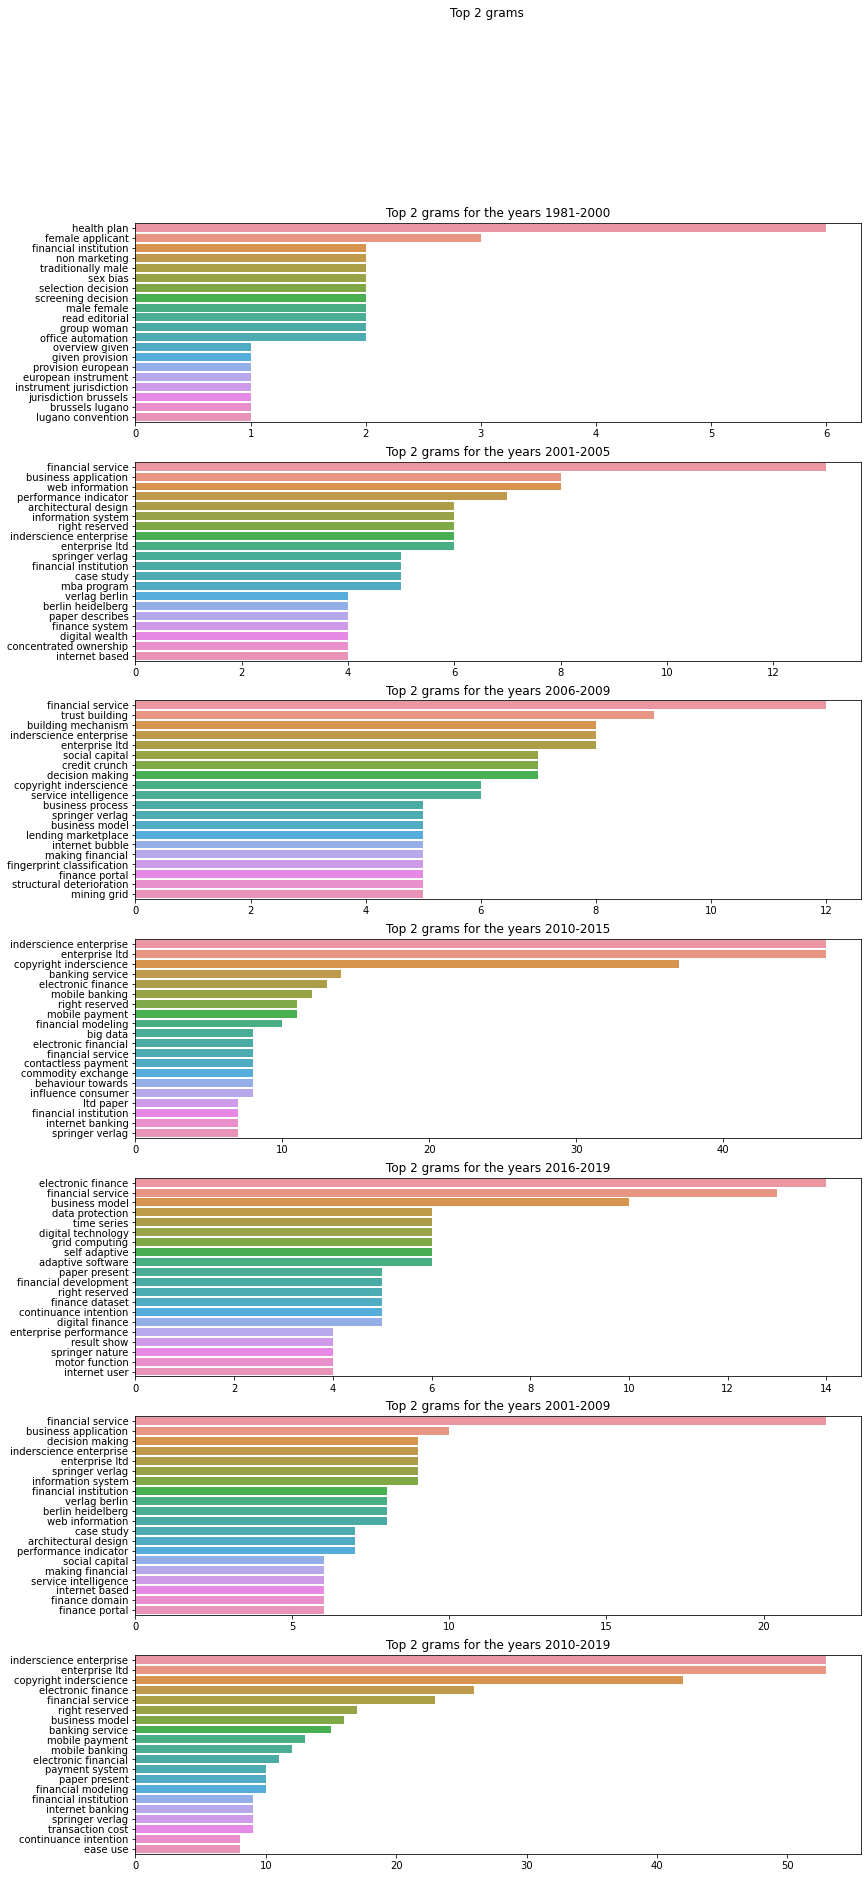

In [50]:
plot_top_ngrams_barchart(num_grams=2, dataframe=combined_data)

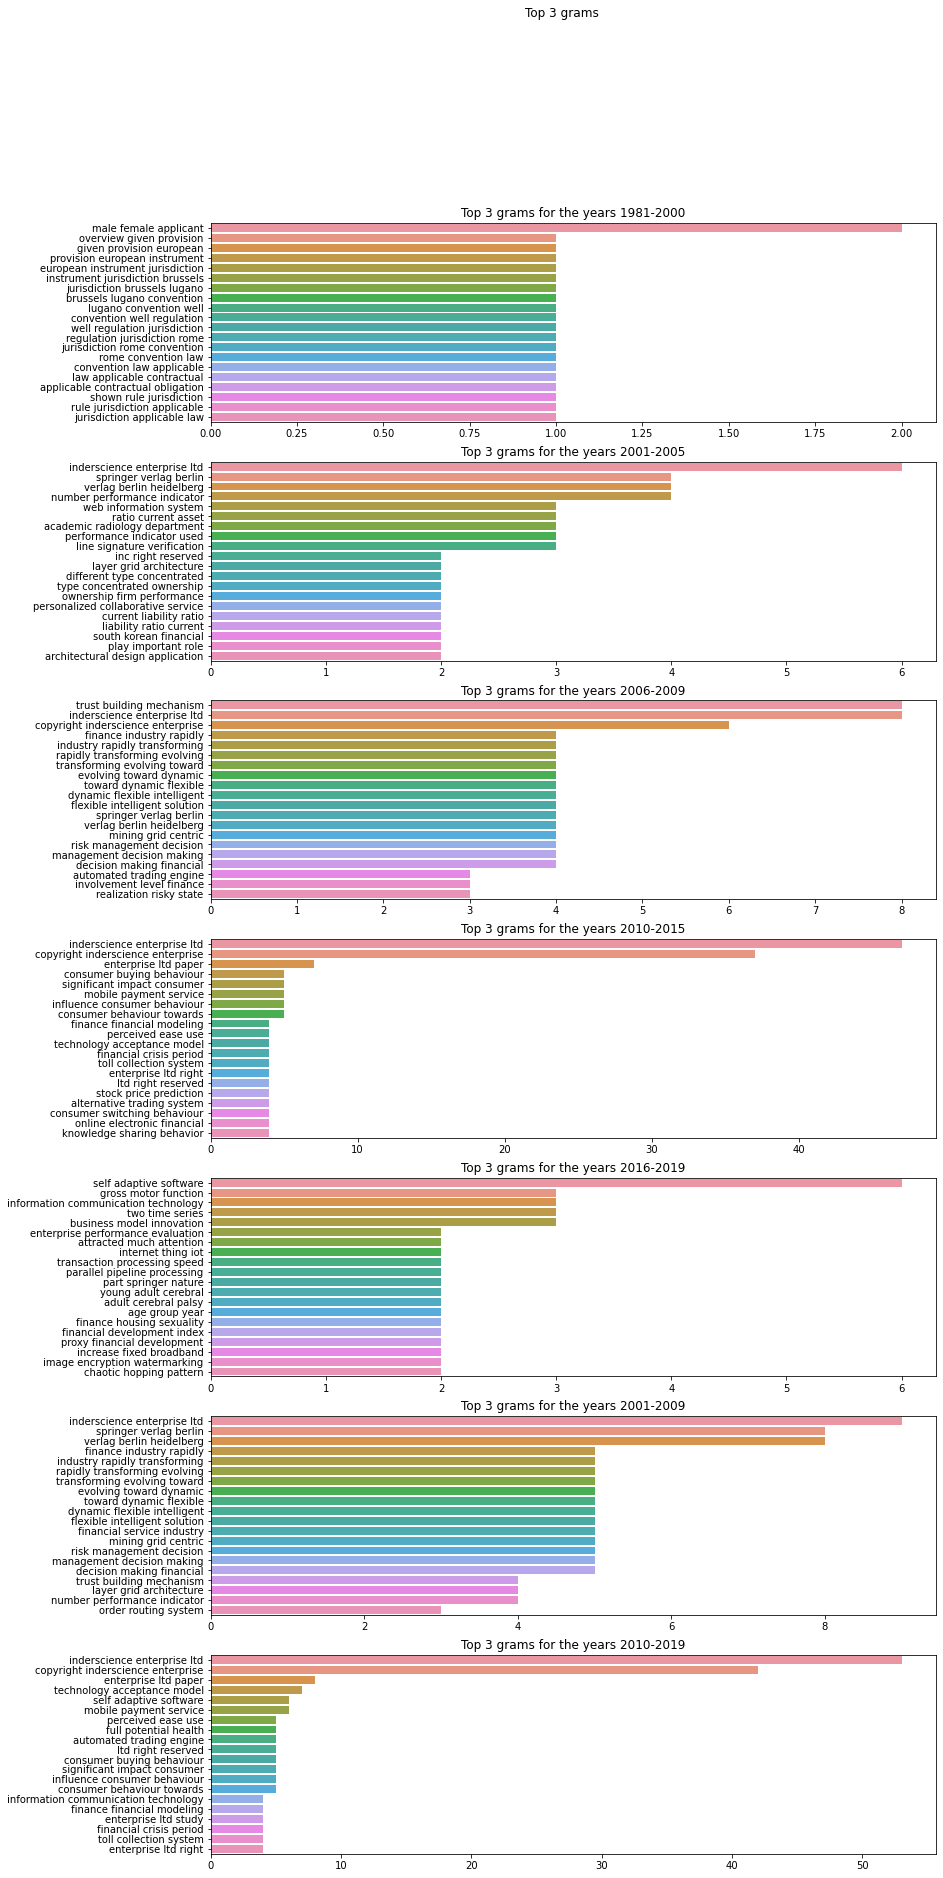

In [51]:
plot_top_ngrams_barchart(num_grams=3, dataframe=combined_data)

Working with the keywords columns (Author keywords and Index Keywords)

In [52]:
print("We have {} missing values in the Author keywords column".format(df["Author Keywords"].isnull().sum()))
print("We have {} missing values in the Index keywords column".format(df["Index Keywords"].isnull().sum()))

We have 48 missing values in the Author keywords column
We have 127 missing values in the Index keywords column


We can see that we have about 48 values are missing in the author keywords columns and 127 in the Index keywords column. 
The Index keywords contain more info than the author keywords column. We could fill in the missing values in the Index keywords column with the keywords we have in the index keywords.

In [53]:
df['Index Keywords'] = df.apply(
    lambda row: row['Author Keywords'] if pd.isnull(row['Index Keywords']) else row['Index Keywords'],
    axis=1
)

df["Index Keywords"].head()

0    Cryptography; Data privacy; Economic and socia...
1    analytical hierarchy process; industrial enter...
2    Blockchain; Boron carbide; Commerce; Internet ...
3    Cerebral palsy; Developmental transition; Disa...
4    E-finance; economic growth; financial developm...
Name: Index Keywords, dtype: object

In [54]:
def clean_keywords(row, stopwords):
    """Pre-process row and generate clean Keywords

    Args:
        row: Text to clean.

    Returns:
        Cleaned row.
    """
    row = str(row).lower()  # Lowercase words
    tokens = row.split(";")
    tokens = [t.lstrip() for t in tokens if not t in stopwords]  # Remove stopwords
    tokens = ["" if t.isdigit() else t for t in tokens]  # Remove digits
    tokens = [t for t in tokens if len(t) > 2]  # Remove short tokens
    return tokens

In [55]:
df["Index Keywords"] = df["Index Keywords"].map(lambda x: clean_keywords(x, stopwords))
df["Index Keywords"].head()

0    [cryptography, data privacy, economic and soci...
1    [analytical hierarchy process, industrial ente...
2    [blockchain, boron carbide, commerce, internet...
3    [cerebral palsy, developmental transition, dis...
4    [e-finance, economic growth, financial develop...
Name: Index Keywords, dtype: object

In [56]:
keywords_corpus = df["Index Keywords"].sum()
len(keywords_corpus)

2028

In [57]:
def draw_word_frequency2(year_range, Keywords):
    """Draw a freuency graph for the words that we have in each year range

    Args:
        year_range: The intended year range in string format
        Keywords: The text document we are drawning a word frequency graph for

    Returns:
        A bar plot
    """
    counter = Counter(Keywords)
    most = counter.most_common()

    x, y= [], []
    for word, count in most[:25]:
        x.append(word)
        y.append(count)
    plt.title(year_range)        
    sns.barplot(x=y, y=x)

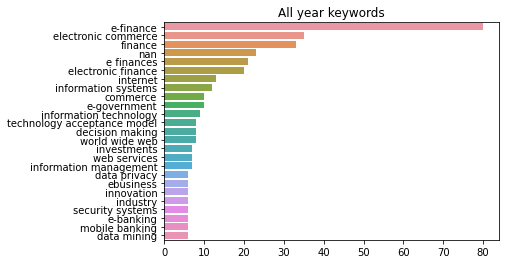

In [58]:
draw_word_frequency2("All year keywords", keywords_corpus)

### Word2Vec 

We could Train a Word2vec model on the abstracts and find the most similar words to the top keywords we have from all the years has seen above

In [59]:
!pip install gensim

You should consider upgrading via the 'c:\users\rahul\anaconda3\python.exe -m pip install --upgrade pip' command.


In [60]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=combined_data["Abstract_words"], vector_size=100, workers=1, seed=42, min_count=3)

In [61]:
model.wv.most_similar("commerce", topn=20)

[('method', 0.9904731512069702),
 ('growth', 0.990330159664154),
 ('activities', 0.9903141856193542),
 ('overview', 0.9902873635292053),
 ('increase', 0.9901872873306274),
 ('payment', 0.9901801943778992),
 ('government', 0.9901723265647888),
 ('perceived', 0.9901379942893982),
 ('key', 0.9901203513145447),
 ('effects', 0.9900989532470703),
 ('jobs', 0.9900966286659241),
 ('well', 0.9900444746017456),
 ('credit', 0.9900330305099487),
 ('performance', 0.9900329113006592),
 ('relationship', 0.9900296926498413),
 ('years', 0.9900249242782593),
 ('time', 0.9900223016738892),
 ('knowledge', 0.9900098443031311),
 ('need', 0.9900082945823669),
 ('ict', 0.9900006055831909)]